### <h1><center> Lab 2: Pandas and Matplotlib </center></h1>

**Goals:** In this notebook we are going to experiment with practical aspects of data science, in particular the application of the Pandas (Part I) and Matplotlib (Part II) libraries. We will use a structured dataset (*Happinesss Report 2021 Dataset*). 

This notebook will follow contents in Chapter 3 and Chapter 4 of the [*Python Data Science Handbook*](https://jakevdp.github.io/PythonDataScienceHandbook/). Please check the book to gain some insight on how to solve the exercises and participate with questions/comments in your Werkcollege.

Using the Pandas library we wil:
- Read a file and load it to a DataFrame
- Filter out the required columns in the DataFrame
- Summarize data based on the fields. Ex: Summing up all the rows corresponding to a certain entry in the dataset

Using the Matplotlib library we will:
- Plot data (Line plot, Scatter plot, Histogram, Error bar plot)
- In an extra notebook (Lab2_Geopandas_Seaborn.ipynb) you can play with plotting a world map with colors representing country metrics (Geopandas) and with Seaborn

<h1><center> Part I: Pandas </center></h1>

In the previous Lab we used **NumPy** and we observed that this library (in particular the *ndarray* data structure) provides essential features to deal with well-organized data, typically seen in numerical tasks. Often, however, in data science projects we need the flexibility to work with labeled data (beyond the integer indexes of *ndarrays*) and to deal with missing data. Also, NumPy offers powerful tools based on element-wise broadcasting, but we will need to perform more general operations (e.g., groupings). **Pandas**, and in particular its *Series* and *DataFrame* objects, builds on the NumPy array structure and provides efficient tools to deal with labeled, unstructured and non-numerical data.

Pandas is well suited for many different kinds of data:

- Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheets
- Ordered and unordered time series data.
- Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
- Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure

The two primary data structures of pandas are Series (1-dimensional) and DataFrame (multi-dimensional). They handle the vast majority of typical use cases in finance, statistics, social science, and many areas of engineering.

<h2><center> Series </center></h2>

The *Series* object provided by Pandas can be seen as a generalization of the NumPy ndarray. 
While in *ndarrays* the indexes are allways consecutive integers, in Series indexes can consist of values of any desired type. *Series* can also be seen as particular Python dictionary with keys that you can iterate.

In [2]:
import numpy as np
import pandas as pd

integer_numpy_array = np.arange(20,25)
pandas_series = pd.Series(integer_numpy_array)

In [2]:
pandas_series.values

array([20, 21, 22, 23, 24])

In [3]:
pandas_series.index

RangeIndex(start=0, stop=5, step=1)

In [4]:
pandas_series[0]

20

In [5]:
pandas_series[2:4]

2    22
3    23
dtype: int32

In [6]:
# Series as a generalized NumPy array, where indexes can be any list

data = pd.Series([0.25, 0.5, 0.75, 1.0], index=[20, 40, 80, 160])

data[160]

1.0

In [7]:
# Series as a specific Python dictionary, where indexes are dictionary keys that you can iterate

population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}

population = pd.Series(population_dict)
population['New York']

19651127

In [8]:
population['Texas':'Florida']

Texas       26448193
New York    19651127
Florida     19552860
dtype: int64

**Q1: Can you create a Series where indexes are the odd numbers from 0 to 10 and values are the square of such numbers**

Expected output:

    1     1
    3     9
    5    25
    7    49
    9    81
    dtype: int64

In [9]:
pd.Series
data = pd.Series([1,9,25,49,81], index=[1,3,5,7,9])
data

1     1
3     9
5    25
7    49
9    81
dtype: int64

<h2><center> DataFrame </center></h2>

The *DataFrame* object provided by Pandas can be seen as a generalization of the 2-dimensional NumPy ndarray. 
The *DataFrame* can, alternativelly, be seen as a sequence of *Series* objects, all sharing the same indexes. We will see that *DataFrame* is a convinient data structure to store data and, additionally, offers useful methods to filter, transform, group and plot data.

In [10]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}

area_dict = {'California': 423967, 
             'Texas': 695662, 
             'New York': 141297,
             'Florida': 170312, 
             'Illinois': 149995}


states = pd.DataFrame({'pop' : population_dict, 'area' : area_dict})

states

,pop,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [11]:
# indexing (dictionary style)

states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [12]:
# indexing
# notice that first we access columns and then rows..

states['area']['Florida']

170312

In [13]:
# indexing through NumPy ndarray of values: Florida=3, area=1
# notice that first we access rows and then columns..

states.values[3][1] # you can also check states.values[3,1]

170312

In [14]:
# slicing
states['area']['Texas':'Florida']

Texas       695662
New York    141297
Florida     170312
Name: area, dtype: int64

In [15]:
# by default, slicing iterates over rows and the stop element in the slice is included

states['Texas':'Florida']

,pop,area
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312


In [16]:
# fancy indexing
states['area'][[1,3,0]]

Texas         695662
Florida       170312
California    423967
Name: area, dtype: int64

In [17]:
# masking
states['area'][states['area'] > 180000]

California    423967
Texas         695662
Name: area, dtype: int64

In [18]:
# add new column
states['density'] = states['pop'] / states['area']
states

,pop,area,density
California,38332521,423967,90.413926
Texas,26448193,695662,38.018740
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121
Illinois,12882135,149995,85.883763


As accessing elements by dictionary-style, array-explicit-style or array-implicit-style can be confusing, there are specific methods you can use to decide the type of indexing:


- .loc -> array-style indexing, explicit indexing using labels
- .iloc -> array-style indexing, implicit indexing using positions

**In the next examples: three ways of accessing the area of Florida... can you understand the differences?**

In [19]:
states.loc['Florida','area']

170312

In [20]:
states.iloc[3,1]

170312

In [21]:
states['area']['Florida']

170312

**Q2: Can you calculate the difference in population size between Texas and New York? Try to answer using the 3 different types of DataFrame indexing introduced above.**

Expected result in any of the possibilities: 6797066

In [22]:
print("Explicit", states.loc['Texas','pop']-states.loc['New York','pop'])
print("Implicit", states.iloc[1,0]-states.iloc[2,0])
print("Dictionary", states['pop']['Texas']-states['pop']['New York'])

Explicit 6797066
Implicit 6797066
Dictionary 6797066


loc and iloc are also convinient to desambiguate indexing when Indexes are integers:

In [3]:
data = pd.Series(['d', 'c', 'b', 'a'], index=[3, 2, 1, 0])
data# will the output be 'a' or 'd'?

3    d
2    c
1    b
0    a
dtype: object

In [24]:
data[1:3] #-> -> implicit indexing used; the stop element in the slice is not included

2    c
1    b
dtype: object

In [25]:
data.iloc[0]

'd'

In [26]:
data.loc[0]

'a'

In [5]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}

area_dict = {'California': 423967, 
             'Texas': 695662, 
             'New York': 141297,
             'Florida': 170312, 
             'Illinois': 149995}


states = pd.DataFrame({'pop' : population_dict, 'area' : area_dict})

In [6]:
states.loc['Florida']
states

,pop,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


**Q3: Create a new column in the DataFrame *states* that contains a boolean to indicate if population size is higher than 20000000**

Expected outcome: DataFrame with extra column named "popSize2000" with True in indexes California and Texas and False otherwise

In [29]:
states['popSize2000'] = (states['pop'] > 20000000)
states

,pop,area,popSize2000
California,38332521,423967,True
Texas,26448193,695662,True
New York,19651127,141297,False
Florida,19552860,170312,False
Illinois,12882135,149995,False


**Q4: Select the states with density (i.e., populaltion/area) higher than 100**

Expected outcome: DataFrame with two rows (New York and Florida) and three columns (pop, area, popSize2000)

In [30]:
states[states['pop']/states['area'] > 100]

,pop,area,popSize2000
New York,19651127,141297,False
Florida,19552860,170312,False


We can apply most aggregation functions (that we were used to apply with NumPy) to Pandas DataFrames. We can aggregate along either rows or columns. Below one example of calculating the mean population across states

In [31]:
states['pop'].mean()

23373367.2

**Q5: Select the area of the largest state**

Tip: check the Secion "*Simple Aggregation in Pandas*" of the Python Data Science Handbook

The question asks for the area of the largest state. To print the name of the largest state the method [idxmax]("https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.idxmax.html") can be handy... **Can you use idxmax to print the name of the largest state?**

Expetected output: 

695662

Texas

In [32]:
print(states['area'][states['area'].idxmax()])
print(states['area'].idxmax())

695662
Texas


In [33]:
# applying universal functions: indices are aligned and perserved
A = pd.DataFrame(np.ones((2, 2)), columns=list('AB'))
B = pd.DataFrame(np.arange(9).reshape(3,3), columns=list('BAC'))
A + B

,A,B,C
0,2.0,1.0,NaN
1,5.0,4.0,NaN
2,NaN,NaN,NaN


Pandas provides useful methods to deal with missing items. Note that when adding DataFrame A and B there is a column and row of NaN added; that is because DataFrame A is missing row 2 column C, both present in DataFrame B. Below, see how convenient it is to replace NaN with a default value when applying the operation add — the NaN are substituted in DataFrame A, to guarantee index/column alignment between A and B before the operation add is applied:

In [34]:
dfC = A.add(B, fill_value=-100)
dfC

,A,B,C
0,2.0,1.0,-98.0
1,5.0,4.0,-95.0
2,-93.0,-94.0,-92.0


**Q6: Can you calculate the sum of COLUMNS A, B and C of dataFrame dfC ?**

Expected outcome: 

    A    -86.0
    B    -89.0
    C   -285.0
    dtype: float64

In [35]:
dfC.sum()

A    -86.0
B    -89.0
C   -285.0
dtype: float64

**Q7: Can you calculate the mean of ROWS indexed by 0, 1 and 2 of DataFrame dfC ?**

Expected outcome: 

    0   -31.666667
    1   -28.666667
    2   -93.000000
    dtype: float64

In [36]:
dfC.mean()

A   -28.666667
B   -29.666667
C   -95.000000
dtype: float64

<h2><center> Working with a real dataset </center></h2>

In the next examples we are going to read and use a structured dataset (*DataPanelWHR2021C2.xls*) which corresponds to Happiness World Report 2021. Make sure to have *DataPanelWHR2021C2.xls* in the same folder as this Jupyter Notebook. This dataset will be useful also in Assignment 1.

You can find more info about the meaning of each column in the *DataPanelWHR2021C2.xls* dataset [here](https://happiness-report.s3.amazonaws.com/2021/Appendix1WHR2021C2.pdf), page 1-3.

Importantly, *Life Ladder* corresponds to the happiness index.

Some clarifications regarding the code below:
- we are importing Excel data
- index_col=[0,1] means that we will use as Index column 0 and column 1 of the excel file
- Note that we are specifying 2 Indexes. This means we will have a DataFrame with a MultiIndex (examples provided below); if confused, plase read section "Hierarchichal Indexing" of the recommended [book]("https://jakevdp.github.io/PythonDataScienceHandbook/03.05-hierarchical-indexing.html")

In [37]:
happinessdataframe = pd.read_excel('DataPanelWHR2021C2.xls', index_col=[0,1]) 
happinessdataframe

Life Ladder  Log GDP per capita  Social support  \
Country name year                                                    
Afghanistan  2008     3.723590            7.370100        0.450662   
             2009     4.401778            7.539972        0.552308   
             2010     4.758381            7.646709        0.539075   
             2011     3.831719            7.619532        0.521104   
             2012     3.782938            7.705479        0.520637   
...                        ...                 ...             ...   
Zimbabwe     2016     3.735400            7.984372        0.768425   
             2017     3.638300            8.015738        0.754147   
             2018     3.616480            8.048798        0.775388   
             2019     2.693523            7.950132        0.759162   
             2020     3.159802            7.828757        0.717243   

                   Healthy life expectancy at birth  \
Country name year                                     
Afghanistan  2008                         50.799999   
             2009                         51.200001   
             2010                         51.599998   
             2011                         51.919998   
             2012                         52.240002   
...                                             ...   
Zimbabwe     2016                         54.400002   
             2017                         55.000000   
             2018                         55.599998   
             2019                         56.200001   
             2020                         56.799999   

                   Freedom to make life choices  Generosity  \
Country name year                                             
Afghanistan  2008                      0.718114    0.167640   
             2009                      0.678896    0.190099   
             2010                      0.600127    0.120590   
             2011                      0.495901    0.162427   
             2012                      0.530935    0.236032   
...                                         ...         ...   
Zimbabwe     2016                      0.732971   -0.094634   
             2017                      0.752826   -0.097645   
             2018                      0.762675   -0.068427   
             2019                      0.631908   -0.063791   
             2020                      0.643303   -0.008696   

                   Perceptions of corruption  Positive affect  Negative affect  
Country name year                                                               
Afghanistan  2008                   0.881686         0.517637         0.258195  
             2009                   0.850035         0.583926         0.237092  
             2010                   0.706766         0.618265         0.275324  
             2011                   0.731109         0.611387         0.267175  
             2012                   0.775620         0.710385         0.267919  
...                                      ...              ...              ...  
Zimbabwe     2016                   0.723612         0.737636         0.208555  
             2017                   0.751208         0.806428         0.224051  
             2018                   0.844209         0.710119         0.211726  
             2019                   0.830652         0.716004         0.235354  
             2020                   0.788523         0.702573         0.345736  

[1949 rows x 9 columns]

**Q9: Can you select data corresponding to The Netherlands, from 2005 to 2020?**

Expected output: DataFrame with 14 rows (2005 - 2020) and 9 columns (all columns in the previous DataFrame)

In [38]:
selection = [('Netherlands', n) for n in range(2005, 2021)]
happinessdataframe.loc[happinessdataframe.index.isin(selection)]

Life Ladder  Log GDP per capita  Social support  \
Country name year                                                    
Netherlands  2005     7.463979           10.813766        0.947358   
             2007     7.451880           10.881042        0.943854   
             2008     7.631012           10.898621        0.944202   
             2010     7.501876           10.864328        0.956537   
             2011     7.563798           10.875057        0.938396   
             2012     7.470716           10.861000        0.938885   
             2013     7.406550           10.856749        0.924705   
             2014     7.321188           10.867284        0.908996   
             2015     7.324437           10.882255        0.879010   
             2016     7.540877           10.898613        0.925944   
             2017     7.458965           10.921394        0.936501   
             2018     7.463097           10.941197        0.939443   
             2019     7.425269           10.953283        0.941477   
             2020     7.504448           10.900500        0.943956   

                   Healthy life expectancy at birth  \
Country name year                                     
Netherlands  2005                         70.400002   
             2007                         70.800003   
             2008                         71.000000   
             2010                         71.400002   
             2011                         71.519997   
             2012                         71.639999   
             2013                         71.760002   
             2014                         71.879997   
             2015                         72.000000   
             2016                         72.099998   
             2017                         72.199997   
             2018                         72.300003   
             2019                         72.400002   
             2020                         72.500000   

                   Freedom to make life choices  Generosity  \
Country name year                                             
Netherlands  2005                      0.901008         NaN   
             2007                      0.896018    0.344347   
             2008                      0.883287    0.365200   
             2010                      0.921448    0.349346   
             2011                      0.925432    0.335668   
             2012                      0.877119    0.288119   
             2013                      0.918996    0.304530   
             2014                      0.910180    0.331311   
             2015                      0.903979    0.261447   
             2016                      0.907310    0.238664   
             2017                      0.920320    0.250440   
             2018                      0.919985    0.161489   
             2019                      0.885593    0.212534   
             2020                      0.934523    0.151298   

                   Perceptions of corruption  Positive affect  Negative affect  
Country name year                                                               
Netherlands  2005                   0.571342         0.869353         0.232795  
             2007                   0.445437         0.817750         0.213336  
             2008                   0.418940         0.788195         0.181690  
             2010                   0.398592         0.853234         0.206079  
             2011                   0.359396         0.862723         0.181386  
             2012                   0.433754         0.860641         0.226290  
             2013                   0.504530         0.866824         0.235443  
             2014                   0.456948         0.867766         0.220657  
             2015                   0.411822         0.834134         0.202129  
             2016                   0.433304         0.838432         0.214851  
             2017                   

In [39]:
happinessdataframe.loc[('Netherlands', 2016)]

Life Ladder                          7.540877
Log GDP per capita                  10.898613
Social support                       0.925944
Healthy life expectancy at birth    72.099998
Freedom to make life choices         0.907310
Generosity                           0.238664
Perceptions of corruption            0.433304
Positive affect                      0.838432
Negative affect                      0.214851
Name: (Netherlands, 2016), dtype: float64

In [40]:
happinessdataframe.mean()

Life Ladder                          5.466707
Log GDP per capita                   9.368459
Social support                       0.812553
Healthy life expectancy at birth    63.359375
Freedom to make life choices         0.742567
Generosity                           0.000108
Perceptions of corruption            0.747111
Positive affect                      0.709998
Negative affect                      0.268552
dtype: float64

In [41]:
# Group each row by Country name; For each Country, present the mean of each column
happinessdataframe.groupby('Country name').mean()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Country name,,,,,,,,,
Afghanistan,3.594628,7.650843,0.508245,52.266667,0.518012,0.070041,0.843283,0.548687,0.326684
Albania,5.019427,9.384397,0.716316,67.546154,0.662830,-0.082628,0.869360,0.653794,0.299265
Algeria,5.389717,9.328897,0.803582,65.290000,0.519009,-0.144289,0.690871,0.608373,0.262206
Angola,4.420299,8.989725,0.737973,53.550000,0.455957,-0.088023,0.867018,0.613339,0.351173
Argentina,6.310166,10.033868,0.904423,67.900000,0.768254,-0.159684,0.841997,0.833451,0.284020
...,...,...,...,...,...,...,...,...,...
Venezuela,6.019735,9.480086,0.910089,65.958666,0.666390,-0.164148,0.795206,0.801747,0.260001
Vietnam,5.305872,8.655294,0.829133,66.928571,0.882548,0.002600,0.784752,0.645487,0.206513
Yemen,3.912124,8.102699,0.739803,54.866666,0.622404,-0.126301,0.824832,0.530582,0.293548


**Q10: Can you grop each row by Year and, for each year, present the mean of each column?**

Expected output: same as above but grouped by year

In [42]:
happinessdataframe.groupby('year').mean()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,,,,,,,,,
2005,6.446164,10.118638,0.897367,67.007407,0.829618,0.256230,0.715875,0.748566,0.255710
2006,5.196935,9.044298,0.835852,60.147500,0.730508,0.006719,0.755737,0.719074,0.254611
2007,5.418291,9.172917,0.807694,61.305269,0.687329,0.014866,0.792069,0.709138,0.250222
2008,5.418554,9.167252,0.784401,61.249954,0.688365,0.021439,0.764120,0.706241,0.243531
2009,5.457640,9.263778,0.819076,62.418929,0.687435,-0.005369,0.763371,0.706094,0.246989
2010,5.496782,9.393829,0.831849,63.069028,0.708278,0.003363,0.757199,0.712103,0.240695
2011,5.424088,9.286865,0.802802,62.212126,0.732204,-0.014482,0.755170,0.701571,0.248833
2012,5.443751,9.390575,0.809077,63.216991,0.711235,-0.002029,0.757945,0.706998,0.260280
2013,5.394568,9.373259,0.806548,63.326483,0.727886,-0.000164,0.763475,0.711921,0.271239


In [43]:
# Group each row by Country name; For each different country name, present the maximum of each column
happinessdataframe.groupby('Country name').aggregate(np.max)

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Country name,,,,,,,,,
Afghanistan,4.758381,7.725029,0.559072,53.200001,0.718114,0.236032,0.954393,0.710385,0.502474
Albania,5.867422,9.544080,0.833047,69.300003,0.824212,0.008912,0.914284,0.713300,0.350427
Algeria,6.354898,9.362022,0.839397,66.099998,0.592696,0.005087,0.758704,0.660510,0.377112
Angola,5.589001,9.016735,0.754615,54.599998,0.583702,0.055257,0.911320,0.658647,0.370875
Argentina,6.775805,10.112445,0.938463,69.199997,0.881224,-0.122354,0.884742,0.863786,0.342497
...,...,...,...,...,...,...,...,...,...
Venezuela,7.478455,9.826082,0.955278,66.900002,0.838198,-0.031057,0.890125,0.867409,0.396250
Vietnam,5.767344,8.992331,0.897655,68.099998,0.952469,0.200575,0.837870,0.751160,0.240607
Yemen,4.809259,8.453350,0.870043,57.500000,0.705815,0.011009,0.885429,0.610585,0.378784


In [44]:
# Group each row by Country; For each different country name, present max, mean and min of column Life Ladder
happinessdataframe.groupby('Country name')['Life Ladder'].aggregate(['max', 'mean', 'min'])

,max,mean,min
Country name,,,
Afghanistan,4.758381,3.594628,2.375092
Albania,5.867422,5.019427,4.511101
Algeria,6.354898,5.389717,4.744627
Angola,5.589001,4.420299,3.794838
Argentina,6.775805,6.310166,5.792797
...,...,...,...
Venezuela,7.478455,6.019735,4.041115
Vietnam,5.767344,5.305872,5.022699
Yemen,4.809259,3.912124,2.982674


**Q11: Can you group data by year and, for each year, present the mean and variance for the 'Healthy life expectancy at birth'?**

Expected outcome: DataFrame with 16 rows (2005 - 2020) and 2 columns (mean, var)

In [45]:
happinessdataframe.groupby('year').aggregate(['mean', 'var'])

Life Ladder           Log GDP per capita           Social support  \
            mean       var               mean       var           mean   
year                                                                     
2005    6.446164  0.844823          10.118638  0.476296       0.897367   
2006    5.196935  1.198057           9.044298  1.551811       0.835852   
2007    5.418291  1.098097           9.172917  1.251016       0.807694   
2008    5.418554  1.367577           9.167252  1.487770       0.784401   
2009    5.457640  1.060225           9.263778  1.328425       0.819076   
2010    5.496782  1.267010           9.393829  1.270211       0.831849   
2011    5.424088  1.175053           9.286865  1.400689       0.802802   
2012    5.443751  1.246778           9.390575  1.268280       0.809077   
2013    5.394568  1.394212           9.373259  1.238401       0.806548   
2014    5.389023  1.335262           9.370981  1.320640       0.805651   
2015    5.404037  1.245694           9.396412  1.372737       0.798211   
2016    5.399414  1.300986           9.403018  1.393625       0.811937   
2017    5.460421  1.301515           9.397034  1.394529       0.805164   
2018    5.499454  1.173970           9.406760  1.349359       0.812338   
2019    5.570894  1.236298           9.477088  1.307748       0.816771   
2020    5.840611  0.957811           9.751327  0.904150       0.838907   

               Healthy life expectancy at birth             \
           var                             mean        var   
year                                                         
2005  0.007095                        67.007407  20.699944   
2006  0.012506                        60.147500  78.181017   
2007  0.012059                        61.305269  68.739182   
2008  0.021571                        61.249954  72.044729   
2009  0.012148                        62.418929  55.791123   
2010  0.010852                        63.069028  61.979362   
2011  0.016264                        62.212126  63.509604   
2012  0.012717                        63.216991  51.064395   
2013  0.012130                        63.326483  52.162851   
2014  0.013306                        63.295948  51.872672   
2015  0.015845                        63.665073  51.368034   
2016  0.015658                        63.860034  53.269823   
2017  0.014929                        64.090233  50.214747   
2018  0.013232                        64.555377  45.744589   
2019  0.013861                        65.003919  44.225108   
2020  0.011174                        67.099564  34.120020   

     Freedom to make life choices           Generosity            \
                             mean       var       mean       var   
year                                                               
2005                     0.829618  0.011127   0.256230       NaN   
2006                     0.730508  0.019728   0.006719  0.028560   
2007                     0.687329  0.021867   0.014866  0.028288   
2008                     0.688365  0.026513   0.021439  0.026538   
2009                     0.687435  0.023199  -0.005369  0.026526   
2010                     0.708278  0.020462   0.003363  0.026077   
2011                     0.732204  0.022160  -0.014482  0.026058   
2012                     0.711235  0.023218  -0.002029  0.028613   
2013                     0.727886  0.018690  -0.000164  0.029630   
2014                     0.734468  0.020612   0.020238  0.028595   
2015                     0.748704  0.018613   0.019700  0.027604   
2016                     0.763137  0.016450   0.000678  0.023867   
2017                     0.780577  0.016216  -0.006532  0.024971   
2018                     0.783938  0.013797  -0.023105  0.025662   
2019                     0.794567  0.013649  -0.019844  0.023736   
2020                     0.817830  0.009447  -0.007945  0.018791   

     Perceptions of corruption           Positive affect            \
                          mean       var            mean

idxmax() can be applied to a DataFrame to obtain the maximum for each group; in the example below, we select the Index (Country, year) where the maximum 'Healthy life expectancy at birth' is observed

In [46]:
happinessdataframe['Healthy life expectancy at birth'][0:-1].idxmax()

('Singapore', 2019)

**Q12: Which was the happiest country in 2020? (using idmax and 1 line of code)**

Tip: [:,2020] can be used to select data for all countries in 2020

Expected outcome: 'Finland'

In [47]:
happinessdataframe['Life Ladder'][:,2020].idxmax()

'Finland'

**Q13: What was the Healthy life expectancy at birth in 2018, by country?** 

Expected outcome: 

    Country name
    Afghanistan    52.599998
    Albania        68.699997
    Algeria        65.900002
    Argentina      68.800003
    Armenia        66.900002
                 ...    
    Venezuela      66.500000
    Vietnam        67.900002
    Yemen          56.700001
    Zambia         55.299999
    Zimbabwe       55.599998
    Name: Healthy life expectancy at birth, Length: 142, dtype: float64

In [48]:
happinessdataframe['Healthy life expectancy at birth'][:,2018]

Country name
Afghanistan    52.599998
Albania        68.699997
Algeria        65.900002
Argentina      68.800003
Armenia        66.900002
                 ...    
Venezuela      66.500000
Vietnam        67.900002
Yemen          56.700001
Zambia         55.299999
Zimbabwe       55.599998
Name: Healthy life expectancy at birth, Length: 142, dtype: float64

**Q14: What was the average GDP of the Netherlands from 2013 to 2019 (inclusive)?** 

Expected output: 10.90265941619873

In [49]:
happinessdataframe.loc['Netherlands'].loc[2013:2019]['Log GDP per capita'].mean()

10.902967861720494

<h2><center> Matplotlib </center></h2>

Matplotlib is the package for visualization in Python. We will now use the previous dataset and produce some visualizations. Just as we use the <code>np</code> shorthand for NumPy and the <code>pd</code> shorthand for Pandas, we will use mpl and <code>plt</code> as standard shorthands for Matplotlib imports.

A potentially confusing feature of Matplotlib is its dual interfaces: a MATLAB-style state-based interface, and a more powerful object-oriented interface.

In our Labs we will mainly use the object-oriented interface as it provides greater flexibility. In practice, we will always call methods over an object Axes.

We will first see some plot types and then plot quantities of interest related with the Happiness Report 2021 dataset.

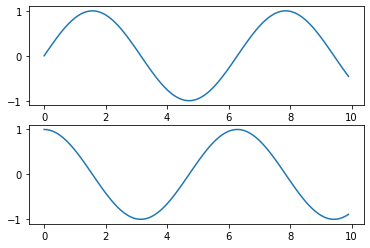

In [50]:
import matplotlib.pyplot as plt

# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)


x = np.arange(0,10,0.1)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

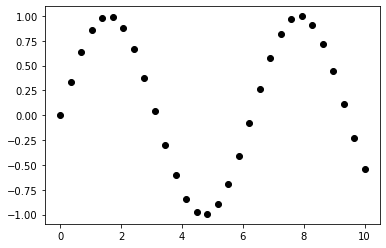

In [51]:
fig, ax = plt.subplots()
np.linspace
x = np.linspace(0, 10, 30)
y = np.sin(x)

ax.plot(x, y, 'o', color='black');

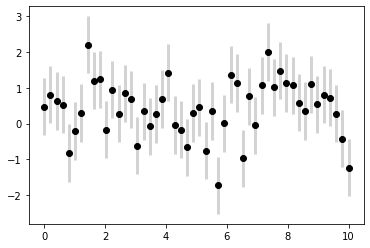

In [52]:
fig, ax = plt.subplots()

x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)
ax.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0)

plt.show()

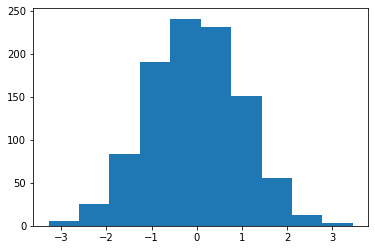

In [53]:
ax = plt.subplot()

data = np.random.randn(1000)

ax.hist(data)

plt.show()

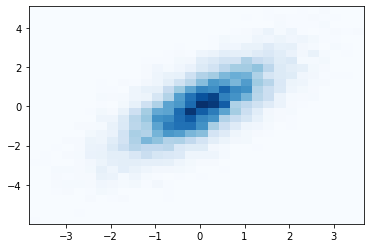

In [54]:
ax = plt.subplot()

mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

plot2d = ax.hist2d(x, y, bins=30, cmap='Blues')

plt.show()

<h2><center> Working with a real dataset </center></h2>

How did the world mean GDP evolved from 2006 to 2020? You will see one answer to this question using matplotlib explicitely, and another using the interface to plot provided by Pandas:

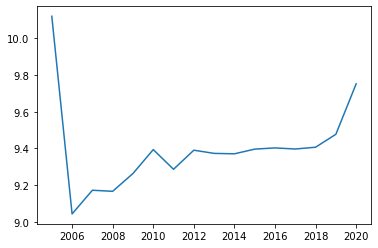

In [55]:
# using matplotlib explicitly
x = happinessdataframe.groupby('year').mean()['Log GDP per capita']
fig, ax = plt.subplots()
ax.plot(x)
plt.show()

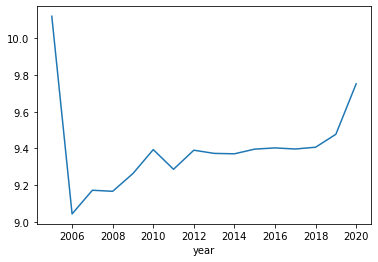

In [56]:
# using .plot() applied to DataFrame
# this is a shortcut for the code in the previous cell
x = happinessdataframe.groupby('year').mean()['Log GDP per capita']
x.plot()
plt.show()

How do countries distribute in terms of GDP and corruptioon, in 2020?

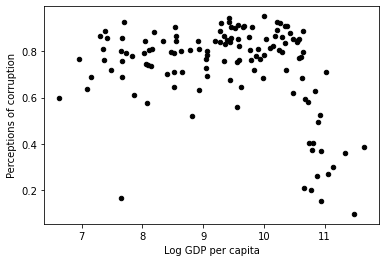

In [57]:
x = happinessdataframe.loc(axis=0)[:,2018][["Log GDP per capita","Perceptions of corruption"]]
x.plot.scatter(x="Log GDP per capita", y="Perceptions of corruption",c='black')
plt.show()

What was the mean happiness over the years? How much does it vary across countries, per year?

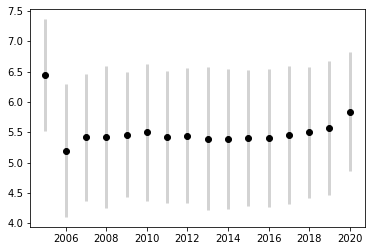

In [58]:
x = happinessdataframe.groupby('year').aggregate(np.mean)["Life Ladder"]
dy = happinessdataframe.groupby('year').aggregate(np.std)["Life Ladder"]

fig, ax = plt.subplots()

ax.errorbar(x.index, x.values, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0)

plt.show()

How do countries distributed in terms of Life expectancy in 2014?

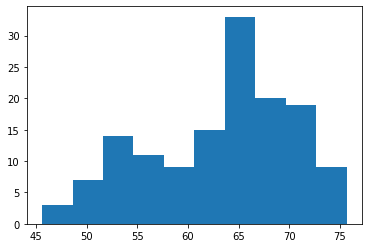

In [59]:
ax = plt.subplot()

data = happinessdataframe.loc(axis=0)[:,2014]["Healthy life expectancy at birth"]

ax.hist(data)

plt.show()

**Q15: What was the relationship between GDP and Healthy life expectancy at birth in 2014? — produce a Scatter plot to visualize this relationship**

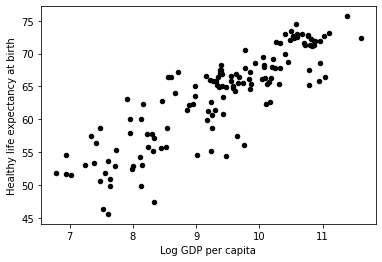

In [60]:
x = happinessdataframe.loc(axis=0)[:,2014][["Log GDP per capita","Healthy life expectancy at birth"]]
x.plot.scatter(x="Log GDP per capita", y="Healthy life expectancy at birth",c='black')
plt.show()

**Q16: How does the distribution of life expectancy in the top 50% happiest countries compare with the bottom 50%, considering all years?**

Suggestion: show this relationship in a plot with two histograms, one for the top 50% happiest countries and another for the bottom 50%.

Tips: 
- Check Figure 4-37, and respective code, of the book Python Data Science Handbook
- Each histogram corresponds to the countries with Life Ladder highest than the median : <code>happinessdataframe["Life Ladder"].median()</code>

In [61]:
average_data = happinessdataframe.groupby("Country name").median()
median = happinessdataframe["Life Ladder"].median()
print(median)

top_50 = average_data[average_data["Life Ladder"] >= median]["Healthy life expectancy at birth"]
bottom_50 = average_data[average_data["Life Ladder"] < median]["Healthy life expectancy at birth"]

print(len(top_50))
print(len(bottom_50))

5.3860249519348145
80
86


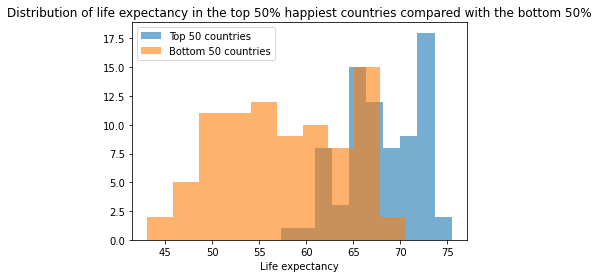

In [62]:
kwargs = dict(histtype='stepfilled', alpha=0.6)
fig, ax = plt.subplots()
ax.hist(top_50, **kwargs, label="Top 50 countries")
ax.hist(bottom_50, **kwargs, label="Bottom 50 countries")
ax.xaxis.label.set_text("Life expectancy")
ax.legend()
ax.title.set_text("Distribution of life expectancy in the top 50% happiest countries compared with the bottom 50%")

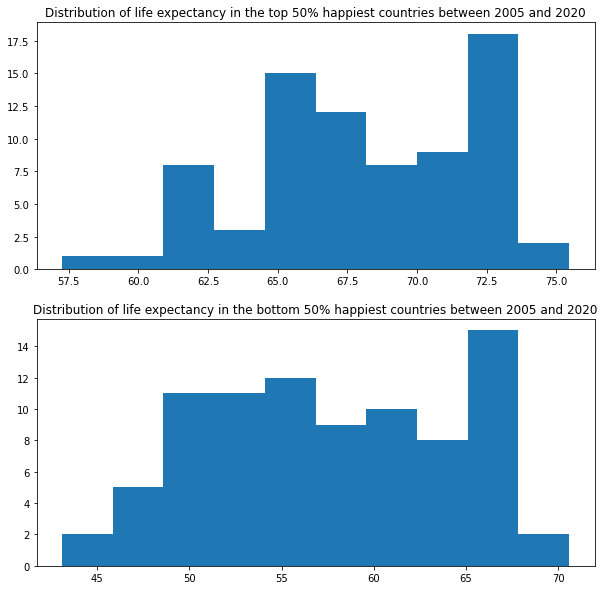

In [63]:
fig, ax = plt.subplots(2)
ax[0].hist(top_50)
ax[0].title.set_text("Distribution of life expectancy in the top 50% happiest countries between 2005 and 2020")
ax[1].hist(bottom_50)
ax[1].title.set_text("Distribution of life expectancy in the bottom 50% happiest countries between 2005 and 2020")

fig.set_size_inches(10, 10)

In [64]:
happinessdataframe.loc[["Somalia", "Guyana"]]

Life Ladder  Log GDP per capita  Social support  \
Country name year                                                    
Somalia      2014     5.528273                 NaN        0.610836   
             2015     5.353645                 NaN        0.599281   
             2016     4.667941                 NaN        0.594417   
Guyana       2007     5.992826            8.773289        0.848765   

                   Healthy life expectancy at birth  \
Country name year                                     
Somalia      2014                         49.599998   
             2015                         50.099998   
             2016                         50.000000   
Guyana       2007                         57.259998   

                   Freedom to make life choices  Generosity  \
Country name year                                             
Somalia      2014                      0.873879         NaN   
             2015                      0.967869         NaN   
             2016                      0.917323         NaN   
Guyana       2007                      0.694006    0.110037   

                   Perceptions of corruption  Positive affect  Negative affect  
Country name year                                                               
Somalia      2014                   0.456470         0.834454         0.207215  
             2015                   0.410236         0.900668         0.186736  
             2016                   0.440802         0.891423         0.193282  
Guyana       2007                   0.835569         0.767541         0.296420

In [65]:
happinessdataframe.loc(axis=0)[:,2019:2020]

Life Ladder  Log GDP per capita  Social support  \
Country name year                                                    
Afghanistan  2019     2.375092            7.697248        0.419973   
Albania      2019     4.995318            9.544080        0.686365   
             2020     5.364910            9.497252        0.710115   
Algeria      2019     4.744627            9.336946        0.803259   
Argentina    2019     6.085561           10.000340        0.896371   
...                        ...                 ...             ...   
Yemen        2019     4.196913                 NaN        0.870043   
Zambia       2019     3.306797            8.154642        0.637894   
             2020     4.837992            8.116580        0.766872   
Zimbabwe     2019     2.693523            7.950132        0.759162   
             2020     3.159802            7.828757        0.717243   

                   Healthy life expectancy at birth  \
Country name year                                     
Afghanistan  2019                         52.400002   
Albania      2019                         69.000000   
             2020                         69.300003   
Algeria      2019                         66.099998   
Argentina    2019                         69.000000   
...                                             ...   
Yemen        2019                         57.500000   
Zambia       2019                         55.799999   
             2020                         56.299999   
Zimbabwe     2019                         56.200001   
             2020                         56.799999   

                   Freedom to make life choices  Generosity  \
Country name year                                             
Afghanistan  2019                      0.393656   -0.108459   
Albania      2019                      0.777351   -0.099263   
             2020                      0.753671    0.006968   
Algeria      2019                      0.385083    0.005087   
Argentina    2019                      0.817053   -0.210719   
...                                         ...         ...   
Yemen        2019                      0.651308         NaN   
Zambia       2019                      0.811040    0.077462   
             2020                      0.750422    0.056029   
Zimbabwe     2019                      0.631908   -0.063791   
             2020                      0.643303   -0.008696   

                   Perceptions of corruption  Positive affect  Negative affect  
Country name year                                                               
Afghanistan  2019                   0.923849         0.351387         0.502474  
Albania      2019                   0.914284         0.681080         0.273827  
             2020                   0.891359         0.678661         0.265066  
Algeria      2019                   0.740609         0.584944         0.215198  
Argentina    2019                   0.830460         0.825965         0.319055  
...                                      ...              ...              ...  
Yemen        2019                   0.798228         0.542806         0.213043  
Zambia       2019                   0.831956         0.743407         0.394385  
             2020                   0.809750         0.691082         0.344526  
Zimbabwe     2019                   0.830652         0.716004         0.235354  
             2020                   0.788523         0.702573         0.345736  

[239 rows x 9 columns]